In [55]:
import numpy as np
from nilearn import plotting
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMapsMasker, NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import GroupSparseCovarianceCV
from sklearn.covariance import GraphicalLassoCV


In [2]:
n_subjects = 4
def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing. """

    prec = prec.copy()  # avoid side effects

    # Put zeros on the diagonal, for graph clarity.
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))

    # Display covariance matrix
    plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                         vmin=-1, vmax=1, title="%s / covariance" % title,
                         labels=labels)
    # Display precision matrix
    plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                         vmin=-span, vmax=span, title="%s / precision" % title,
                         labels=labels)

In [4]:
msdl_atlas = datasets.fetch_atlas_msdl()
dataset = datasets.fetch_development_fmri(n_subjects=n_subjects)

D:\anaconda\anaconda\envs\mne\lib\site-packages\numpy\lib\npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [10]:
masker = NiftiMapsMasker(msdl_atlas.maps, resampling_target="maps", detrend=True, 
                            high_variance_confounds=True, low_pass=None, 
                            high_pass=0.01, t_r=2, standardize=True)

In [16]:
subject_time_series = []
func_filenames = dataset.func
confound_filenames = dataset.confounds
for func_filename, confound_filename in zip(func_filenames,
                                            confound_filenames):
    print("Processing file %s" % func_filename)

    region_ts = masker.fit_transform(func_filename,
                                 confounds=confound_filename)
    subject_time_series.append(region_ts)

Processing file C:\Users\kumad/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Processing file C:\Users\kumad/nilearn_data\development_fmri\development_fmri\sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Processing file C:\Users\kumad/nilearn_data\development_fmri\development_fmri\sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Processing file C:\Users\kumad/nilearn_data\development_fmri\development_fmri\sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


In [17]:
# Computing group-sparse precision matrices
gsc = GroupSparseCovarianceCV(verbose=2)
gsc.fit(subject_time_series)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 3
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 3
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 3
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 11
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization
[GroupSparseCovarianceCV.fit] tolerance reached at iteration number 19: 8.789e-04


GroupSparseCovarianceCV(verbose=2)

In [18]:
gl = GraphicalLassoCV(verbose=2)
gl.fit(np.concatenate(subject_time_series))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   0s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[GraphicalLassoCV] Done refinement  2 out of 4:   0s


................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.

[GraphicalLassoCV] Done refinement  3 out of 4:   1s


...[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
..............

[GraphicalLassoCV] Done refinement  4 out of 4:   1s
[graphical_lasso] Iteration   0, cost  1.68e+02, dual gap 1.123e+00
[graphical_lasso] Iteration   1, cost  1.68e+02, dual gap -1.664e-03
[graphical_lasso] Iteration   2, cost  1.68e+02, dual gap 1.158e-04
[graphical_lasso] Iteration   3, cost  1.68e+02, dual gap 1.389e-04
[graphical_lasso] Iteration   4, cost  1.68e+02, dual gap 1.530e-04
[graphical_lasso] Iteration   5, cost  1.68e+02, dual gap 1.318e-04
[graphical_lasso] Iteration   6, cost  1.68e+02, dual gap 6.844e-05


..[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GraphicalLassoCV(verbose=2)

In [31]:
# Displaying results
atlas_img = msdl_atlas.maps
atlas_region_coords = plotting.find_probabilistic_atlas_cut_coords(atlas_img)
#msdl_atlas.region_coords
labels = msdl_atlas.labels

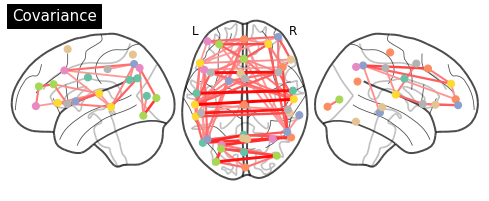

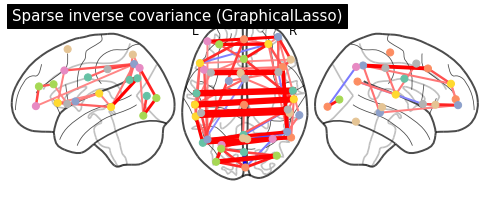

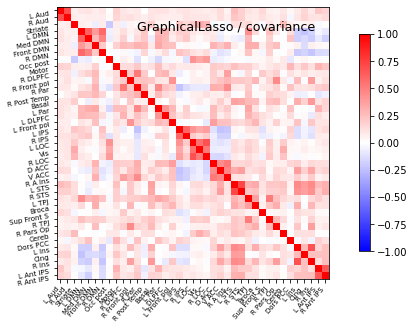

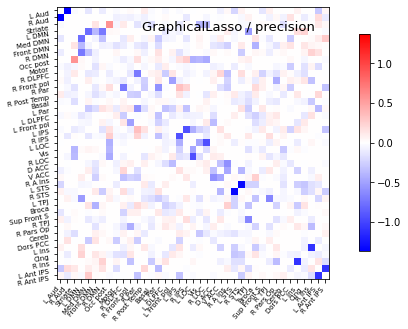

In [32]:
plotting.plot_connectome(gl.covariance_,
                         atlas_region_coords, edge_threshold='90%',
                         title="Covariance",
                         display_mode="lzr")
plotting.plot_connectome(-gl.precision_, atlas_region_coords,
                         edge_threshold='90%',
                         title="Sparse inverse covariance (GraphicalLasso)",
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", labels)

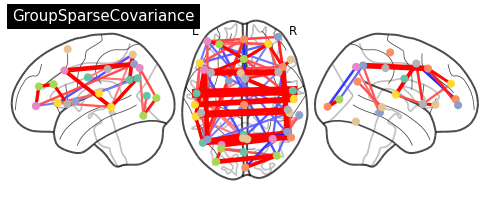

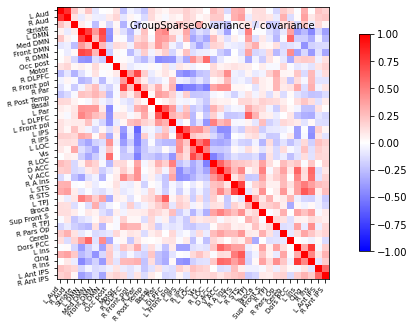

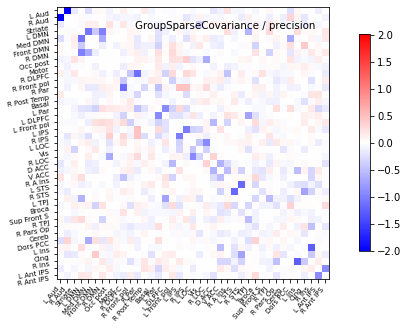

In [39]:
title = "GroupSparseCovariance"
plotting.plot_connectome(-gsc.precisions_[..., 0],
                         atlas_region_coords, edge_threshold='90%',
                         title=title,
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gsc.covariances_[..., 0], gsc.precisions_[..., 0], title, labels)

In [49]:
# Load atlases and Load functional data
yeo = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located '
      'at: %s' % yeo['thick_17'])

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: C:\Users\kumad/nilearn_data\yeo_2011\Yeo_JNeurophysiol11_MNI152\Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


In [54]:
data = datasets.fetch_development_fmri(n_subjects=10)
print('Functional nifti images (4D, e.g., one subject) are located at : %r'
      % data['func'][0])
print('Counfound csv files (of same subject) are located at : %r'
      % data['confounds'][0])

Functional nifti images (4D, e.g., one subject) are located at : 'C:\\Users\\kumad/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : 'C:\\Users\\kumad/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


In [57]:
# Extract coordinates on Yeo atlas - parcellations
connectome_measure = ConnectivityMeasure(kind='correlation')
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True)
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

In [63]:
correlation_matrices = connectome_measure.fit_transform(time_series)
mean_correlation_matrix = connectome_measure.mean_

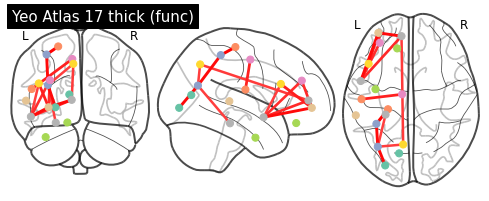

In [64]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])
plotting.plot_connectome(mean_correlation_matrix, coordinates, edge_threshold="90%",
                         title='Yeo Atlas 17 thick (func)')

# Plot a directed connectome - asymmetric connectivity measure
In this section, we use the lag-1 correlation as the connectivity measure, which leads to an asymmetric connectivity matrix. 

The plot_connectome function accepts both symmetric and asymmetric matrices, but plot the latter as a directed graph.

In [65]:
def lag_correlation(time_series, lag):
    n_subjects = len(time_series)
    n_samples, n_features = time_series[0].shape
    lag_cor = np.zeros((n_subjects, n_features, n_features))
    for subject, serie in enumerate(time_series):
        for i in range(n_features):
            for j in range(n_features):
                if lag == 0:
                    lag_cor[subject, i, j] = np.corrcoef(serie[:, i],
                                                         serie[:, j])[0, 1]
                else:
                    lag_cor[subject, i, j] = np.corrcoef(serie[lag:, i],
                                                         serie[:-lag, j])[0, 1]
    return np.mean(lag_cor, axis=0)

D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:2204: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


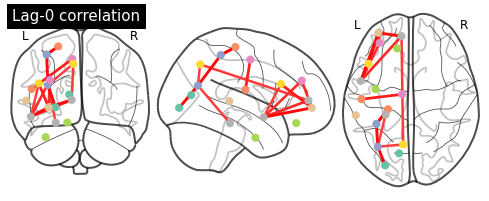

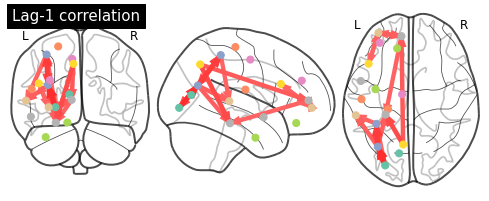

In [66]:
for lag in [0, 1]:
    lag_correlation_matrix = lag_correlation(time_series, lag)
    plotting.plot_connectome(lag_correlation_matrix, coordinates,
                             edge_threshold="90%",
                             title='Lag-{} correlation'.format(lag))

# Load probabilistic atlases - extracting coordinates on brain maps

In [68]:
dim = 64
difumo = datasets.fetch_atlas_difumo(dimension=dim, resolution_mm=2)
masker = NiftiMapsMasker(maps_img=difumo.maps, standardize=True)

D:\anaconda\anaconda\envs\mne\lib\site-packages\numpy\lib\npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [69]:
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The 

In [71]:
correlation_matrices = connectome_measure.fit_transform(time_series)
mean_correlation_matrix = connectome_measure.mean_
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=difumo.maps)

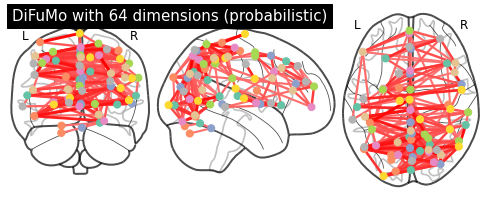

In [72]:
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="90%",
                         title='DiFuMo with {0} dimensions (probabilistic)'.format(dim))